In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
match_data = pd.read_csv("/content/drive/MyDrive/IPL_Analysis/IPL_Matches_2008-2020.csv")
ball_data = pd.read_csv("/content/drive/MyDrive/IPL_Analysis/IPL_Ball-by-Ball_2008-2020.csv")

In [ ]:
match_data.isnull().sum()  #Null values in match data

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [ ]:
ball_data.isnull().sum()  #Null values in ball-by-ball data

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [ ]:
print('Matches played so far:', match_data.shape[0])             #Total no. of matches played
print('\n Cities played at:', match_data['city'].unique())       #Total no. of cities where the matches have been played
print('\n Teams participated:', match_data['team1'].unique())    #Total no. of teams that have participated

Matches played so far: 816

 Cities played at: ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

 Teams participated: ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [ ]:
match_data['Season'] = pd.DatetimeIndex(match_data['date']).year
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [ ]:
# Matches played per season

match_per_season = match_data.groupby(['Season'])['id'].count().reset_index().rename(columns={'id': 'matches'})   
match_per_season

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Total number of Matches played in each Season')

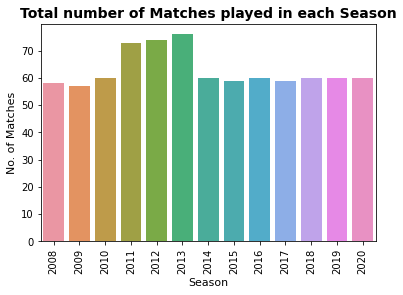

In [ ]:
# Bar graph showing number of matches played per season

sns.countplot(match_data['Season'])   
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Season',fontsize=11)
plt.ylabel('No. of Matches',fontsize=11)
plt.title('Total number of Matches played in each Season', fontsize = 14, fontweight = "bold")

In [ ]:
# Adding id &seasons column to ball-by-ball dataframe for further analysis

season_data=match_data[['id','Season']].merge(ball_data, left_on = 'id', right_on = 'id', how = 'left').drop('id', axis = 1)   
season_data.head()

,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


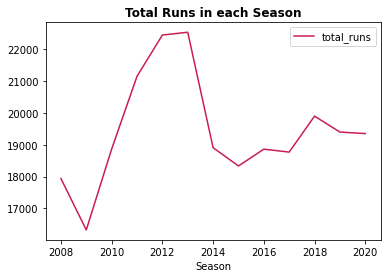

In [ ]:
# Trends of run scored in each season

season=season_data.groupby(['Season'])['total_runs'].sum().reset_index()   
p=season.set_index('Season')
ax = plt.axes()
ax.set(facecolor = "white")
sns.lineplot(data=p,palette="rocket") 
plt.title('Total Runs in each Season',fontsize=12,fontweight="bold")
plt.show()

In [ ]:
# Dataframe showing total number of runs scored per match

runs_per_season=pd.concat([match_per_season,season.iloc[:,1]],axis=1)     
runs_per_season['Runs scored per match']=runs_per_season['total_runs']/runs_per_season['matches']
runs_per_season.set_index('Season',inplace=True)
runs_per_season

,matches,total_runs,Runs scored per match
Season,,,
2008,58,17937,309.258621
2009,57,16320,286.315789
2010,60,18864,314.400000
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22541,296.592105
2014,60,18909,315.150000
2015,59,18332,310.711864
2016,60,18862,314.366667


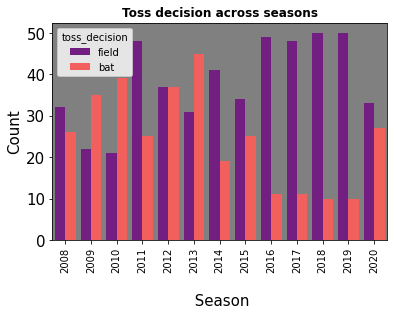

In [ ]:
# Toss decisions made by teams across seasons

ax = plt.axes()    
ax.set(facecolor = "grey")
sns.countplot(x='Season', hue='toss_decision', data=match_data,palette="magma",saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('\n Season',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Toss decision across seasons',fontsize=12,fontweight="bold")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


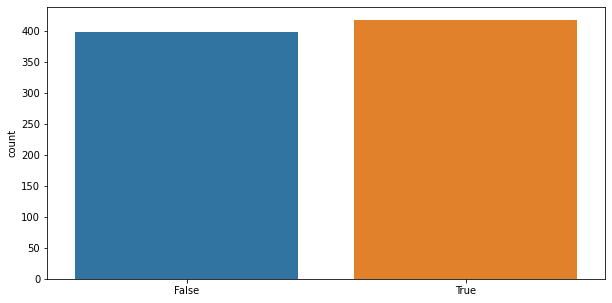

In [ ]:
# Does winning the toss mean winning the match?

toss = match_data['toss_winner'] == match_data['winner']
plt.figure(figsize=(10,5)) 
sns.countplot(toss)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


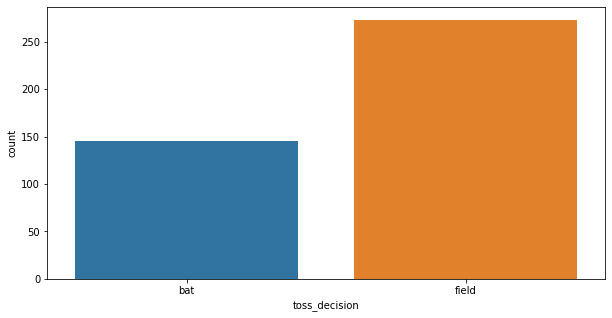

In [ ]:
# What decison after toss leads to more victories?

plt.figure(figsize=(10,5))   
sns.countplot(match_data.toss_decision[match_data.toss_winner == match_data.winner])
plt.show()

In [ ]:
# Talking about Virat Kohli statistics we define a dataframe for his statistics

player = (ball_data['batsman']=='V Kohli')   
df_kohli=ball_data[player]
df_kohli.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
211,335982,2,1,2,V Kohli,W Jaffer,I Sharma,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
212,335982,2,1,3,V Kohli,W Jaffer,I Sharma,0,4,4,0,0,NaN,NaN,NaN,legbyes,Royal Challengers Bangalore,Kolkata Knight Riders
213,335982,2,1,4,V Kohli,W Jaffer,I Sharma,1,0,1,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
216,335982,2,2,1,V Kohli,W Jaffer,AB Dinda,0,0,0,0,0,NaN,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
217,335982,2,2,2,V Kohli,W Jaffer,AB Dinda,0,0,0,0,1,bowled,V Kohli,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders


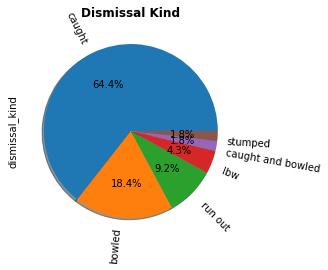

In [ ]:
# Virat Kohli's dissmissal patterns

df_kohli['dismissal_kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True)  
plt.title("Dismissal Kind",fontweight="bold",fontsize=12)
plt.show()

In [ ]:
# Virat Kohli's runs making pattern in terms of scoring amount

def count(df_kohli,runs):    
    return len(df_kohli[df_kohli['batsman_runs']==runs])*runs

print("Runs scored from 1's :",count(df_kohli,1))
print("Runs scored from 2's :",count(df_kohli,2))
print("Runs scored from 3's :",count(df_kohli,3))
print("Runs scored from 4's :",count(df_kohli,4))
print("Runs scored from 6's :",count(df_kohli,6))

Runs scored from 1's : 1919
Runs scored from 2's : 692
Runs scored from 3's : 39
Runs scored from 4's : 2016
Runs scored from 6's : 1212


Text(0.5, 1.0, 'Top 10 run scorers in IPL')

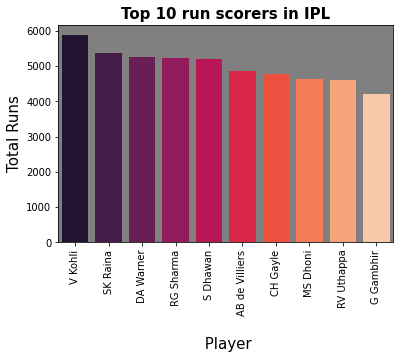

In [ ]:
# Top 10 run scorers of IPL (upto season 2020)

runs = ball_data.groupby(['batsman'])['batsman_runs'].sum().reset_index()   
runs.columns = ['Batsman', 'runs']
y = runs.sort_values(by='runs', ascending = False).head(10).reset_index().drop('index', axis=1)
ax = plt.axes()
ax.set(facecolor = "grey")
sns.barplot(x=y['Batsman'],y=y['runs'],palette='rocket',saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Player',fontsize=15)
plt.ylabel('Total Runs',fontsize=15)
plt.title('Top 10 run scorers in IPL',fontsize=15,fontweight="bold")

Text(0.5, 1.0, 'Highest MOM award winners')

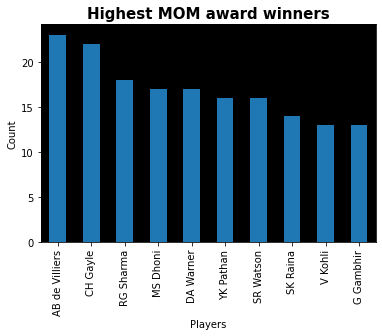

In [ ]:
# Players with highest amount of Man of the Match(MOM) wins

ax = plt.axes()
ax.set(facecolor = "black")
match_data.player_of_match.value_counts()[:10].plot(kind='bar')
plt.xlabel('Players')
plt.ylabel("No. of Awards")
plt.title("Highest MOM award winners",fontsize=15,fontweight="bold")